<a href="https://colab.research.google.com/github/cvillarr123/trading/blob/master/notebook/balance_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/chrisconlan/algorithmic-trading-with-python.git


Cloning into 'algorithmic-trading-with-python'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (314/314), done.
Receiving objects: 100% (341/341), 4.83 MiB | 15.56 MiB/s, done.
remote: Total 341 (delta 44), reused 312 (delta 24), pack-reused 0
Resolving deltas: 100% (44/44), done.


# Nueva sección

# Nueva sección

In [3]:
!pip install bt

     |████████████████████████████████| 2.7MB 5.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765281 sha256=21065ce5d85ad3a00fc8245011128d01354d54b749a5c986801608f960fd5e88
  Stored in directory: /root/.cache/pip/wheels/18/2a/31/ead0e40a43116c3278ea50bdec622d43c9e51263b8a62ad71c
Successfully built bt


In [4]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3MB 6.2MB/s 
     |████████████████████████████████| 143kB 44.6MB/s 
     |████████████████████████████████| 296kB 52.4MB/s 


In [5]:
!pip install alpha_vantage pandas

In [6]:
!pip install plotly==5.0.0

     |████████████████████████████████| 19.1MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [7]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.7MB/s 


In [8]:
!pip install pandas_ta
#https://github.com/twopirllc/pandas-ta#stable


     |████████████████████████████████| 92kB 2.5MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=13430ebdfbf54dd2e13716b8f34de7ed4658c8c8eef25ec14cd514d2e8b86858
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta


In [9]:
%cd algorithmic-trading-with-python/src/

/content/algorithmic-trading-with-python/src


In [10]:
!ls

bootstrap_portfolio.py	       pypm
fit_alternative_data_model.py  simulate_alternative_data_portfolio.py
__init__.py		       simulate_portfolio.py
optimize_portfolio.py	       white_noise_portfolio.py


In [11]:
import sys
sys.path.insert(0, '/content/algorithmic-trading-with-python/src/pypm')

**Librerias a usar para graficas e indicadores**

In [12]:

import pypm
from pypm import metrics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
import datetime
import numpy as np
import plotly.graph_objs as go
import plotly as py



import plotly.express as px
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#metrics.calculate_calmar_ratio

In [13]:
def line_range(df,x_col,y_col,range_x_values,title_msg, hide_weekends,especial_dates, hide_especial_dates) :
  df_trunc = df.copy()
  fig = px.line(df_trunc, x=x_col, y=y_col, range_x=range_x_values, title=title_msg)
  if (hide_weekends) :
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
        ]
    )
  else :
    if (hide_especial_dates) :
      fig.update_xaxes(
          rangebreaks=[
              dict(bounds=["sat", "mon"]), #, #hide weekends
              dict(values=especial_dates)  # hide Christmas and New Year's
          ]
      )
  fig.show()

In [14]:
def lines_plot(dfs,x_cols,y_cols,line_colors,title_msg, hide_weekends,especial_dates, hide_especial_dates) :


    layout = go.Layout(
        xaxis=dict(rangebreaks=[
            dict(bounds=["sat", "mon"])#, # hide weekends
            ],
        ),
        title=go.layout.Title(text=title_msg)   
    )

    fig = go.Figure()

    for i in range(len(x_cols)):
        print(i)
        print(x_cols[i])
        fig.add_trace(go.Scatter(x=dfs[x_cols[i]], y=dfs[y_cols[i]], mode='lines', name=x_cols[i] ,line=dict(color=line_colors[i]) ) )


    if (hide_weekends) :
      fig.update_xaxes(
          rangebreaks=[
              dict(bounds=["sat", "mon"]) #, #hide weekends
          ]
      )
    else :
      if (hide_especial_dates) :
        fig.update_xaxes(
            rangebreaks=[
                dict(bounds=["sat", "mon"]), #, #hide weekends
                dict(values=especial_dates)  # hide Christmas and New Year's
            ]
        )

    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
        ]
    )

    fig.show()

In [15]:
#para dibujar solo velas
def drawCandleStick(data):
    candlestick = go.Candlestick(
        x = data.index,
        open = data['open'],
        high = data['high'], 
        low = data['low'],
        close = data['close']
    )
    # create a plot
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
            #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
        ]
    )
    fig = go.Figure(data=[candlestick])
    fig.show()

In [16]:
fromD = 'GBP'
toD='AUD'
# **Ver el precio de intercambio al cierre**

from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='1035HSNE5D7XWHLM',output_format='pandas')

# There is no metadata in this call
data_exchange_rate, meta_exchange_rate = cc.get_currency_exchange_rate(from_currency=fromD,to_currency=toD)

#data_exchange_rate.head(5)




In [17]:
#pd_filtro_diario=data_daily[ (data_daily.TradeDate  >= pd.to_datetime('2021-02-01', format='%Y-%m-%d')) & ( data_daily.TradeDate  < pd.to_datetime('2021-06-21', format='%Y-%m-%d')) ]
#pd_filtro_diario.head()

In [18]:
# para analisis diario
columns = ['open','high','low','close']

data_daily, meta_daily = cc.get_currency_exchange_daily ( 'GBP','AUD',outputsize='compact')

data_daily.columns = columns
data_daily.sort_index(ascending=True,inplace=True)
data_daily["TradeDate"] = data_daily.index.date
data_daily.TradeDate = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')

data_daily.reset_index(drop=True,inplace=True)
data_daily.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate    datetime64[ns]
dtype: object

In [19]:
data_daily.head()

,open,high,low,close,TradeDate
0,1.78328,1.78943,1.78189,1.78633,2021-02-15
1,1.78608,1.79432,1.78523,1.79122,2021-02-16
2,1.79141,1.79666,1.78582,1.78744,2021-02-17
3,1.78628,1.80236,1.78473,1.79829,2021-02-18
4,1.79839,1.79941,1.77803,1.77938,2021-02-19


In [26]:
titulo='Prices:' + fromD + '-' + toD

In [20]:
np.max(data_daily.TradeDate)

Timestamp('2021-07-02 00:00:00')

In [21]:
np.min(data_daily.TradeDate)

Timestamp('2021-02-15 00:00:00')

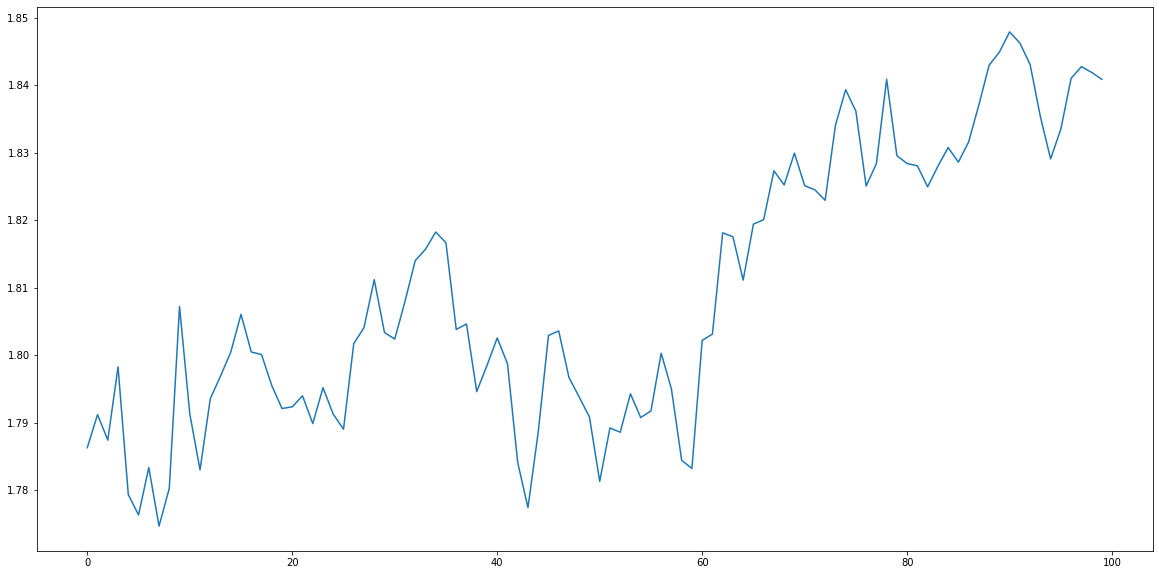

In [22]:
plt.plot(data_daily["close"])

In [23]:

# para analisis mensual

data_monthly, meta_monthly = cc.get_currency_exchange_monthly('GBP','AUD',outputsize='compact')

In [24]:
data_monthly.columns = columns
data_monthly.sort_index(ascending=False,inplace=True)
data_monthly.head(5)

,open,high,low,close
date,,,,
2021-07-02,1.84273,1.84719,1.83908,1.84087
2021-06-30,1.83636,1.85237,1.81909,1.84274
2021-05-31,1.78958,1.84236,1.78024,1.83614
2021-04-30,1.81441,1.82650,1.77372,1.79078
2021-03-31,1.80520,1.81595,1.78057,1.81402


In [25]:
line_range(data_monthly,data_monthly.index,data_monthly.close,['2019-01-01','2021-07-02'],'Closes '+titulo,True,['2021-06-02'],False)

NameError: ignored

In [27]:

# Ver el intraday para el calculo de banderas

data_intraday, meta_intraday = cc.get_currency_exchange_intraday('GBP','AUD',interval='15min',outputsize='full')

data_intraday.columns = columns
data_intraday.sort_index(ascending=True,inplace=True)
data_intraday['TradeDate'] = data_intraday.index.date 


data_intraday['time'] = data_intraday.index.time
data_intraday["date"] = data_intraday.index.to_pydatetime()

format = '%Y-%m-%d %H:%M:%S'

data_intraday['date'] = pd.to_datetime(data_intraday.date, format=format)
data_intraday = data_intraday.set_index(pd.DatetimeIndex(data_intraday['date']))

data_daily.sort_index(ascending=True,inplace=True)

data_intraday.reset_index(drop=True,inplace=True)

#data_intraday.set_index('date',inplace=True)



data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.84503,1.84669,1.84443,1.84633,2021-06-18,05:00:00,2021-06-18 05:00:00
1,1.84637,1.85002,1.84552,1.84983,2021-06-18,05:15:00,2021-06-18 05:15:00
2,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00
3,1.84743,1.84755,1.84479,1.84511,2021-06-18,05:45:00,2021-06-18 05:45:00
4,1.84510,1.84559,1.84272,1.84363,2021-06-18,06:00:00,2021-06-18 06:00:00
5,1.84364,1.84481,1.84261,1.84324,2021-06-18,06:15:00,2021-06-18 06:15:00
6,1.84318,1.84348,1.84100,1.84233,2021-06-18,06:30:00,2021-06-18 06:30:00
7,1.84236,1.84300,1.84071,1.84253,2021-06-18,06:45:00,2021-06-18 06:45:00
8,1.84248,1.84285,1.84138,1.84179,2021-06-18,07:00:00,2021-06-18 07:00:00
9,1.84182,1.84188,1.83980,1.84032,2021-06-18,07:15:00,2021-06-18 07:15:00


In [28]:
data_intraday.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate            object
time                 object
date         datetime64[ns]
dtype: object

In [29]:
data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.84503,1.84669,1.84443,1.84633,2021-06-18,05:00:00,2021-06-18 05:00:00
1,1.84637,1.85002,1.84552,1.84983,2021-06-18,05:15:00,2021-06-18 05:15:00
2,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00
3,1.84743,1.84755,1.84479,1.84511,2021-06-18,05:45:00,2021-06-18 05:45:00
4,1.84510,1.84559,1.84272,1.84363,2021-06-18,06:00:00,2021-06-18 06:00:00
5,1.84364,1.84481,1.84261,1.84324,2021-06-18,06:15:00,2021-06-18 06:15:00
6,1.84318,1.84348,1.84100,1.84233,2021-06-18,06:30:00,2021-06-18 06:30:00
7,1.84236,1.84300,1.84071,1.84253,2021-06-18,06:45:00,2021-06-18 06:45:00
8,1.84248,1.84285,1.84138,1.84179,2021-06-18,07:00:00,2021-06-18 07:00:00
9,1.84182,1.84188,1.83980,1.84032,2021-06-18,07:15:00,2021-06-18 07:15:00


In [30]:
#omitir las fechas de fin de semana
data_intraday = data_intraday[data_intraday.date.dt.dayofweek < 5 ]

In [31]:
data_descartar = data_intraday[data_intraday.date.dt.dayofweek >= 5 ]['close'] + 1
data_descartar

Series([], Name: close, dtype: float64)

In [32]:
data_descartar.head(1)

Series([], Name: close, dtype: float64)

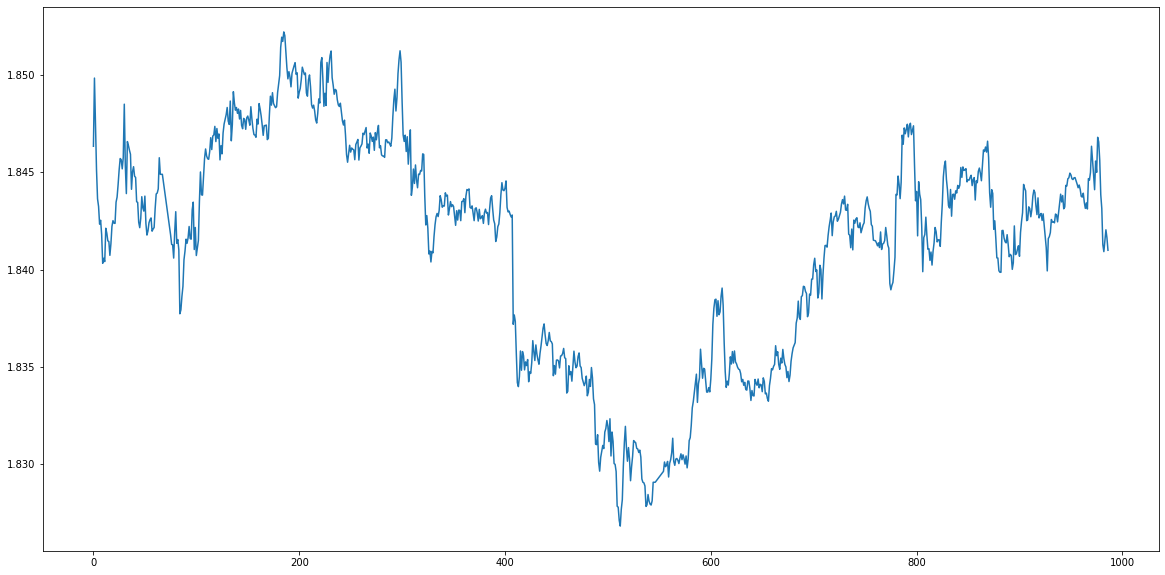

In [33]:
plt.plot(data_intraday["close"])

In [34]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201
2021-06-24,1.83301,1.84552
2021-06-25,1.82580,1.83605
2021-06-28,1.82874,1.83971
2021-06-29,1.83267,1.84394
2021-06-30,1.83796,1.84853


In [35]:
pd_fechas_total = pd.date_range(start=data_intraday.TradeDate.min() , end= data_intraday.TradeDate.max())
type(pd_fechas_total)

pandas.core.indexes.datetimes.DatetimeIndex

In [36]:
pd_fechas_total.to_list()

[Timestamp('2021-06-18 00:00:00', freq='D'),
 Timestamp('2021-06-19 00:00:00', freq='D'),
 Timestamp('2021-06-20 00:00:00', freq='D'),
 Timestamp('2021-06-21 00:00:00', freq='D'),
 Timestamp('2021-06-22 00:00:00', freq='D'),
 Timestamp('2021-06-23 00:00:00', freq='D'),
 Timestamp('2021-06-24 00:00:00', freq='D'),
 Timestamp('2021-06-25 00:00:00', freq='D'),
 Timestamp('2021-06-26 00:00:00', freq='D'),
 Timestamp('2021-06-27 00:00:00', freq='D'),
 Timestamp('2021-06-28 00:00:00', freq='D'),
 Timestamp('2021-06-29 00:00:00', freq='D'),
 Timestamp('2021-06-30 00:00:00', freq='D'),
 Timestamp('2021-07-01 00:00:00', freq='D'),
 Timestamp('2021-07-02 00:00:00', freq='D')]

In [37]:
data_intraday.TradeDate.unique()


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 21),
       datetime.date(2021, 6, 22), datetime.date(2021, 6, 23),
       datetime.date(2021, 6, 24), datetime.date(2021, 6, 25),
       datetime.date(2021, 6, 28), datetime.date(2021, 6, 29),
       datetime.date(2021, 6, 30), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2)], dtype=object)

In [38]:

dt_breaks = [d for d in pd_fechas_total.to_list() if not d in data_intraday.TradeDate.unique()]

In [39]:
dt_breaks

[Timestamp('2021-06-19 00:00:00', freq='D'),
 Timestamp('2021-06-20 00:00:00', freq='D'),
 Timestamp('2021-06-26 00:00:00', freq='D'),
 Timestamp('2021-06-27 00:00:00', freq='D')]

In [40]:
data_intraday.dtypes
data_intraday.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            977, 978, 979, 980, 981, 982, 983, 984, 985, 986],
           dtype='int64', length=973)

In [41]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201
2021-06-24,1.83301,1.84552
2021-06-25,1.82580,1.83605
2021-06-28,1.82874,1.83971
2021-06-29,1.83267,1.84394
2021-06-30,1.83796,1.84853


In [42]:
# busca en que registro (fecha completa hora min seg) se dio el precio minimo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,TradeDate,time,date
11,1.84055,1.84089,1.83955,1.84041,2021-06-18,07:45:00,2021-06-18 07:45:00
85,1.83774,1.83822,1.83655,1.83793,2021-06-21,02:30:00,2021-06-21 02:30:00
258,1.84594,1.84743,1.84411,1.84562,2021-06-22,21:45:00,2021-06-22 21:45:00
329,1.84041,1.84122,1.83979,1.84093,2021-06-23,15:30:00,2021-06-23 15:30:00
412,1.83566,1.83578,1.83301,1.83419,2021-06-24,12:15:00,2021-06-24 12:15:00
513,1.82681,1.82792,1.82580,1.82769,2021-06-25,13:30:00,2021-06-25 13:30:00
559,1.83011,1.83025,1.82874,1.82935,2021-06-28,01:15:00,2021-06-28 01:15:00
656,1.83338,1.83381,1.83267,1.83324,2021-06-29,01:30:00,2021-06-29 01:30:00
775,1.83929,1.83992,1.83796,1.83896,2021-06-30,07:15:00,2021-06-30 07:15:00
883,1.83985,1.84210,1.83908,1.84200,2021-07-01,10:15:00,2021-07-01 10:15:00


In [43]:
# busca en que registro (fecha completa hora min seg) se dio el precio maximo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,TradeDate,time,date
2,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00
138,1.84855,1.84955,1.84745,1.84818,2021-06-21,15:45:00,2021-06-21 15:45:00
183,1.85132,1.85237,1.85095,1.85193,2021-06-22,03:00:00,2021-06-22 03:00:00
299,1.85123,1.85201,1.85059,1.85064,2021-06-23,08:00:00,2021-06-23 08:00:00
401,1.84415,1.84552,1.84405,1.84455,2021-06-24,09:30:00,2021-06-24 09:30:00
467,1.83507,1.83605,1.83480,1.83581,2021-06-25,02:00:00,2021-06-25 02:00:00
612,1.83905,1.83971,1.83781,1.83817,2021-06-28,14:30:00,2021-06-28 14:30:00
730,1.84331,1.84394,1.84296,1.84377,2021-06-29,20:00:00,2021-06-29 20:00:00
789,1.84733,1.84853,1.84651,1.84697,2021-06-30,10:45:00,2021-06-30 10:45:00
869,1.84607,1.84719,1.84578,1.84659,2021-07-01,06:45:00,2021-07-01 06:45:00


In [44]:
import pandas_ta as ta


In [45]:
# Calculate Returns and append to the df DataFrame
data_intraday.ta.log_return(cumulative=False, append=True,percent=True)
data_intraday.ta.percent_return(cumulative=False, append=True,percent=True)

# New Columns with results
data_intraday.columns

# Take a peek
data_intraday.head()



,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1
0,1.84503,1.84669,1.84443,1.84633,2021-06-18,05:00:00,2021-06-18 05:00:00,NaN,NaN
1,1.84637,1.85002,1.84552,1.84983,2021-06-18,05:15:00,2021-06-18 05:15:00,0.001894,0.001896
2,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00,-0.001304,-0.001303
3,1.84743,1.84755,1.84479,1.84511,2021-06-18,05:45:00,2021-06-18 05:45:00,-0.001251,-0.001250
4,1.84510,1.84559,1.84272,1.84363,2021-06-18,06:00:00,2021-06-18 06:00:00,-0.000802,-0.000802


In [46]:
data_intraday["close_return"] = metrics.calculate_return_series(data_intraday.close)*100
data_intraday["close_log_return"] = metrics.calculate_log_return_series(data_intraday.close)*100

In [47]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return
0,1.84503,1.84669,1.84443,1.84633,2021-06-18,05:00:00,2021-06-18 05:00:00,NaN,NaN,NaN,NaN
1,1.84637,1.85002,1.84552,1.84983,2021-06-18,05:15:00,2021-06-18 05:15:00,0.001894,0.001896,0.189565,0.189386
2,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00,-0.001304,-0.001303,-0.130282,-0.130367
3,1.84743,1.84755,1.84479,1.84511,2021-06-18,05:45:00,2021-06-18 05:45:00,-0.001251,-0.001250,-0.125039,-0.125117
4,1.84510,1.84559,1.84272,1.84363,2021-06-18,06:00:00,2021-06-18 06:00:00,-0.000802,-0.000802,-0.080212,-0.080244


In [48]:
data_intraday['intra_return'] = data_intraday.close.pct_change()*100

In [49]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return
0,1.84503,1.84669,1.84443,1.84633,2021-06-18,05:00:00,2021-06-18 05:00:00,NaN,NaN,NaN,NaN,NaN
1,1.84637,1.85002,1.84552,1.84983,2021-06-18,05:15:00,2021-06-18 05:15:00,0.001894,0.001896,0.189565,0.189386,0.189565
2,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00,-0.001304,-0.001303,-0.130282,-0.130367,-0.130282
3,1.84743,1.84755,1.84479,1.84511,2021-06-18,05:45:00,2021-06-18 05:45:00,-0.001251,-0.001250,-0.125039,-0.125117,-0.125039
4,1.84510,1.84559,1.84272,1.84363,2021-06-18,06:00:00,2021-06-18 06:00:00,-0.000802,-0.000802,-0.080212,-0.080244,-0.080212


In [50]:


df_trunc = data_intraday.copy()

fig = px.line(df_trunc, x='date', y='intra_return', range_x=['2021-06-22', '2021-07-01'], title='Retorno Porcentual precios:'+fromD + '-' + toD)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)
fig.show()




Ver la variabilidad a traves de un histograma del retorno porcentual del precio de cierre

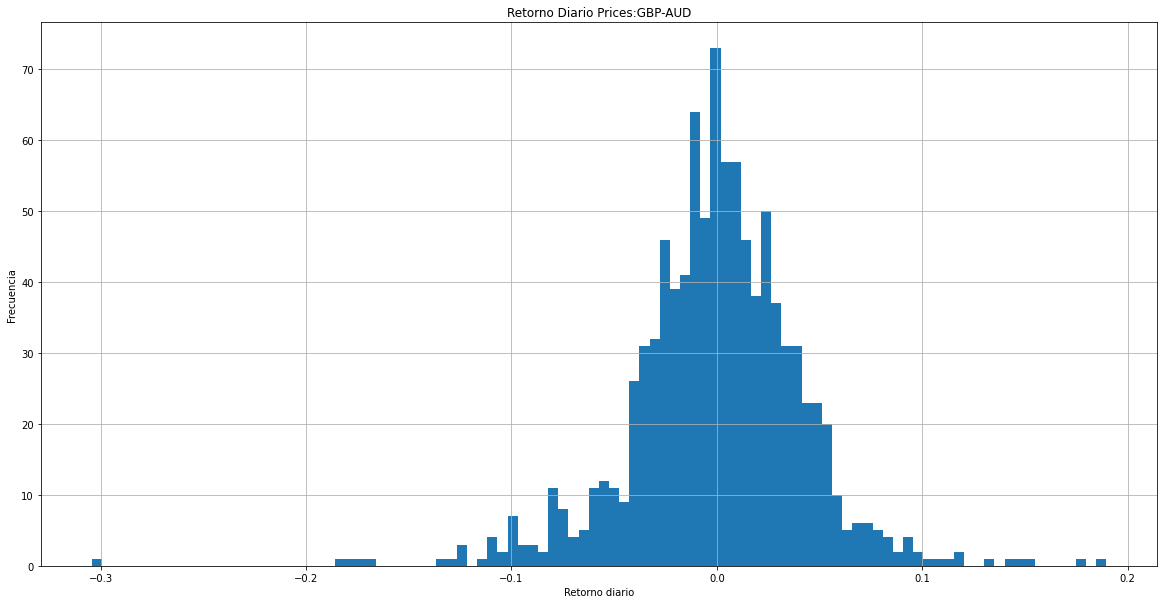

In [51]:
data_intraday['intra_return'].hist(bins=100)
plt.ylabel('Frecuencia')
plt.xlabel('Retorno diario')
plt.title('Retorno Diario '+titulo)
plt.show()

In [52]:
# si quisiera hacer un resample de intraday a dia
resample_diary = data_intraday.set_index('date').resample('D').mean()
resample_diary.head(5)
resample_weekly = data_intraday.set_index('date').resample('W').mean()
resample_weekly.head(5)


,open,high,low,close,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return
date,,,,,,,,,
2021-06-20,1.843695,1.844511,1.842627,1.843688,-0.000012,-0.000011,-0.001147,-0.001165,-0.001147
2021-06-27,1.842150,1.842756,1.841233,1.842109,-0.000018,-0.000018,-0.001814,-0.001823,-0.001814
2021-07-04,1.840111,1.840706,1.839260,1.840114,0.000015,0.000015,0.001506,0.001499,0.001506


In [53]:
data_intraday['MVS50']=data_intraday['close'].rolling(window=50).mean()

In [54]:
#MVS30 = pd.DataFrame()
#MVS30['close']=market['close'].rolling(window=30).mean()
data_intraday['MVS30']=data_intraday['close'].rolling(window=30).mean()

In [55]:
#MVS30[MVS30.close.notna()].head()

In [56]:
#MVS100 = pd.DataFrame()
#MVS100['close']=market['close'].rolling(window=100).mean()
data_intraday['MVS100']=data_intraday['close'].rolling(window=100).mean()

In [57]:
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100
0,1.84503,1.84669,1.84443,1.84633,2021-06-18,05:00:00,2021-06-18 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.84637,1.85002,1.84552,1.84983,2021-06-18,05:15:00,2021-06-18 05:15:00,0.001894,0.001896,0.189565,0.189386,0.189565,NaN,NaN,NaN


In [58]:
#def lines_plot(dfs,x_cols,y_cols,line_colors,title_msg, hide_weekends,especial_dates, hide_especial_dates) :

#x_columns_data = ['close','MVS30','MVS100']
#y_columns_data = ['date','date','date']
#line_colors = ['black','green','blue']
#lines_plot(data_intraday,x_columns_data,y_columns_data,line_colors,titulo,True,'2021-06-02',False)


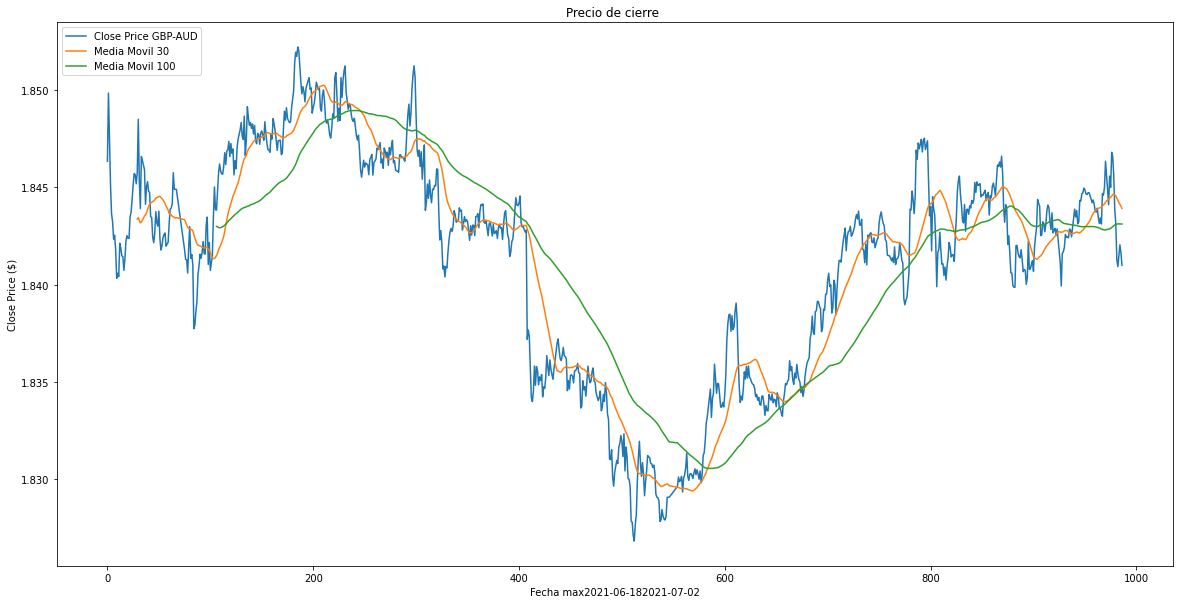

In [59]:
plt.figure()
plt.plot(data_intraday['close'], label = 'Close Price GBP-AUD')
plt.plot(data_intraday['MVS30'], label = 'Media Movil 30')
plt.plot(data_intraday['MVS100'], label = 'Media Movil 100')
plt.title('Precio de cierre '  )
plt.xlabel( 'Fecha max' +  str( np.min(data_intraday.TradeDate) ) + str(np.max(data_intraday.TradeDate)  ))
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [60]:
str(np.min(data_daily.TradeDate) )

'2021-02-15 00:00:00'

In [61]:
str(np.max(data_daily.TradeDate) )


'2021-07-02 00:00:00'

In [62]:

data_intraday['MVS10'] = ta.sma(data_intraday["close"], length=10)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10
981,1.84318,1.84354,1.84090,1.84128,2021-07-02,10:45:00,2021-07-02 10:45:00,-0.001004,-0.001004,-0.100373,-0.100423,-0.100373,1.844095,1.844438,1.843106,1.844674
982,1.84129,1.84208,1.84053,1.84092,2021-07-02,11:00:00,2021-07-02 11:00:00,-0.000196,-0.000196,-0.019552,-0.019554,-0.019552,1.844065,1.844314,1.843116,1.844278
983,1.84092,1.84199,1.84044,1.84150,2021-07-02,11:15:00,2021-07-02 11:15:00,0.000315,0.000315,0.031506,0.031501,0.031506,1.844046,1.844207,1.843111,1.844018
984,1.84189,1.84239,1.84145,1.84204,2021-07-02,11:30:00,2021-07-02 11:30:00,0.000293,0.000293,0.029324,0.029320,0.029324,1.844039,1.844118,1.843112,1.843665
985,1.84204,1.84241,1.84096,1.84163,2021-07-02,11:45:00,2021-07-02 11:45:00,-0.000223,-0.000223,-0.022258,-0.022260,-0.022258,1.844014,1.844020,1.843112,1.843329
986,1.84160,1.84169,1.84049,1.84099,2021-07-02,12:00:00,2021-07-02 12:00:00,-0.000348,-0.000348,-0.034752,-0.034758,-0.034752,1.843978,1.843907,1.843107,1.842749


In [63]:
def senal(data, columna_analisis1, columna_analisis2):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data[columna_analisis1][dia] > data[columna_analisis2][dia]:
            if condicion != 1:
                compra.append(data['close'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data[columna_analisis1][dia] < data[columna_analisis2][dia]:
            if condicion != -1:
                venta.append(data['close'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)

In [64]:
senales = senal(data_intraday.set_index('date'),'MVS30','MVS100')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(3)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10,PosibleCompra,PosibleVenta
106,1.84391,1.84430,1.84282,1.84382,2021-06-21,07:45:00,2021-06-21 07:45:00,-0.000011,-0.000011,-0.001085,-0.001085,-0.001085,1.842138,1.841488,1.842985,1.842612,NaN,1.84382
107,1.84382,1.84507,1.84313,1.84475,2021-06-21,08:00:00,2021-06-21 08:00:00,0.000504,0.000504,0.050439,0.050426,0.050439,1.842158,1.841604,1.842969,1.842741,NaN,NaN
108,1.84484,1.84639,1.84420,1.84570,2021-06-21,08:15:00,2021-06-21 08:15:00,0.000515,0.000515,0.051497,0.051484,0.051497,1.842224,1.841774,1.842928,1.843208,NaN,NaN


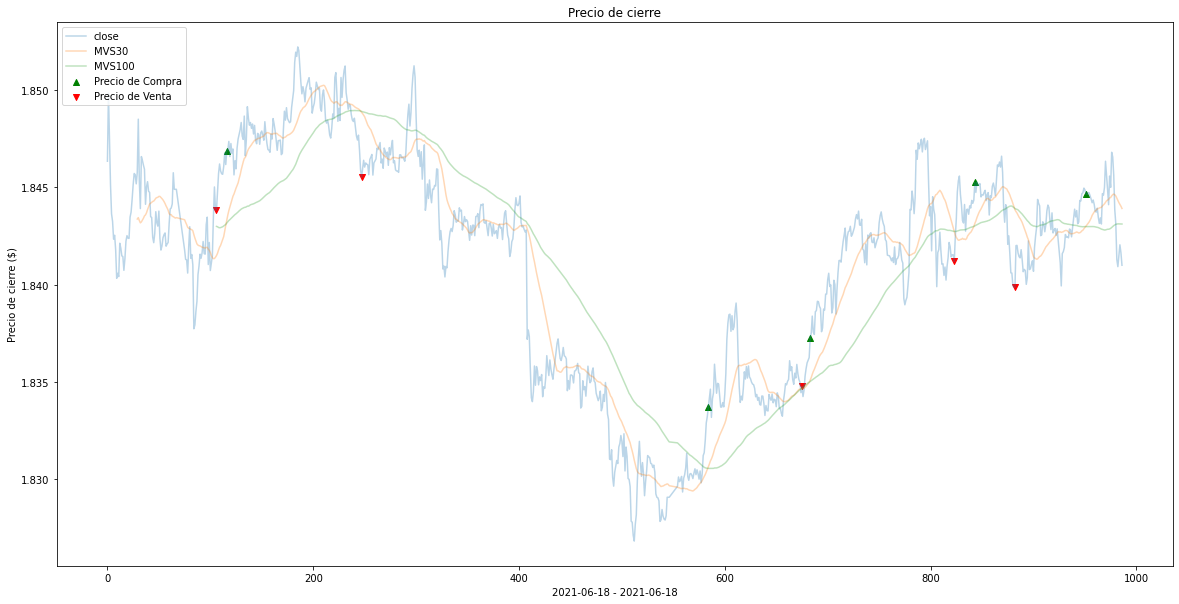

In [65]:
plt.figure()
plt.plot(data_intraday['close'], label = 'close', alpha = 0.3)
plt.plot(data_intraday['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data_intraday['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data_intraday.index, data_intraday['PosibleCompra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data_intraday.index, data_intraday['PosibleVenta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Precio de cierre')
plt.xlabel( str(np.min(data_intraday.TradeDate) ) + ' - ' +  str(np.min(data_intraday.TradeDate) ))
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [94]:
df_trunc = data_intraday.copy()
layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text='Estrategia simple' + titulo)   
)



fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.close, mode='lines',  name='Close Price',line=dict(color='grey')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS30, mode='lines',  name='MVS30',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS100, mode='lines',  name='MVS100',line=dict(color='red')))

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.PosibleCompra, mode='markers',marker =dict(
            color='green',
            size=10,
            symbol=[5]
            ),  name='PosibleCompra',line=dict(color='green')))

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.PosibleVenta, mode='markers', marker =dict(
            color='red',
            size=10,
            symbol=[6]
            ), name='PosibleVenta',line=dict(color='red')))



fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()

In [73]:
def bbands(price, window_size=10, num_of_std=5):
    rolling_mean = price.rolling(window=window_size).mean()
    rolling_std  = price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return rolling_mean, upper_band, lower_band

bb_avg, bb_upper, bb_lower = bbands(data_intraday.close)

In [92]:
df_trunc = data_intraday.copy()
layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text="Bandas Bollinger " + titulo)   
)



fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.close, mode='lines',  name='Close Price',line=dict(color='grey')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_avg, mode='lines',  name='bb_avg',line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_upper, mode='lines',  name='bb_upper',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=bb_lower, mode='lines',  name='bb_lower',line=dict(color='red')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()

In [ ]:
import chart_studio as ch

In [ ]:
data_intraday["TimeDate"] = data_intraday.index
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10,PosibleCompra,PosibleVenta,TimeDate
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00,0.000201,0.000201,0.020067,0.020065,0.020067,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:


df_long=pd.melt(data_intraday, id_vars=['TimeDate','date'], value_vars=['MVS30', 'MVS100'])


df_long.head(3)

,TimeDate,date,variable,value
0,0,2021-06-17 19:30:00,MVS30,NaN
1,1,2021-06-17 19:45:00,MVS30,NaN
2,2,2021-06-17 20:00:00,MVS30,NaN


PARA IMPRIMIR VELAS SIN EL RANGO DE FECHAS DE FIN DE SEMANA

In [ ]:

layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text="A Figure Specified By A Graph Object")   
)

trace = go.Candlestick(x=df_trunc.date, open=df_trunc.open, high=df_trunc.high, low=df_trunc.low, close=df_trunc.close,
                       name=titulo)

data = [trace]

fig = go.Figure(data=data,layout=layout)

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS30, mode='lines',  name='MVS30',line=dict(color='black')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS100, mode='lines',  name='MVS100',line=dict(color='blue')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()
#py.offline.plot(fig, filename='USDCAD.html')

In [89]:
#para evaluar activos

# # Download historical prices
# bt_data = bt.get('fb, amzn, goog, nflx, aapl',
               # start='2020-6-1', end='2020-12-1')
# # Print the top five rows
# print(bt_data.head())
# # Define the strategy
# bt_strategy = bt.Strategy('Trade_Weekly', 
                         # [bt.algos.RunWeekly(),
                          # bt.algos.SelectAll(),
                          # bt.algos.WeighEqually(),
                          # bt.algos.Rebalance()])
# # Create a backtest
# bt_test = bt.Backtest(bt_strategy, bt_data)
# # Run the backtest
# bt_res = bt.run(bt_test)
# # Plot the test result
# bt_res.plot(title="Backtest result")
# plt.show()

In [90]:
# # Calculate 12-day EMA
# stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# # Calculate 26-day EMA
# stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

# # Plot the EMAs with price
# plt.plot(stock_data['EMA_12'], label='EMA_12')
# plt.plot(stock_data['EMA_26'], label='EMA_26')
# plt.plot(stock_data['Close'], label='Close')

# # Customize and show the plot
# plt.legend()
# plt.title('EMAs')
# plt.show()